In [2]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression#sns.set()

In [3]:
df = pd.read_csv('105.csv')	
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Datenbereinigung
### Hinweis 
in meisten Fall, die beste Methode um fehlender Wert zu handeln, ist, dass Listwise deletion. In kompliyierter Situation, kann man Listwise deletion mit multiple imputation vergleichen. Aber die Voraussetzung für multiple imputation ist die felender Wert nach dem Zufallprinzip.

In [4]:
#na entfernen
print(df.isnull().sum())
df_dropna = df.dropna()
df_dropna.isnull().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [5]:
df_dropna.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


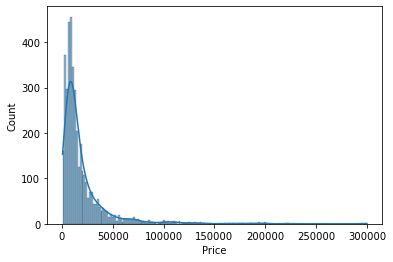

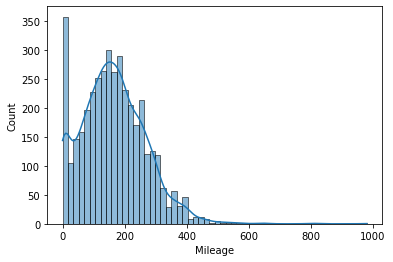

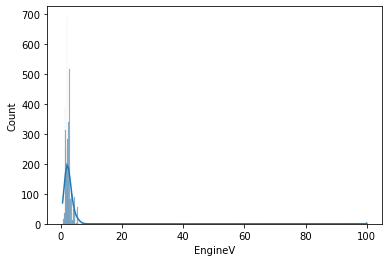

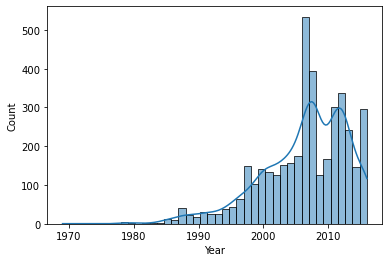

In [6]:
#histogramm numerischer Spalten
numerical_columns = df_dropna.select_dtypes(include=['number']).columns
for i in numerical_columns:
    sns.histplot(df_dropna[i], kde=True)
    plt.show()

In [7]:
#ausreisser entfernen
def drop_outlier(df, field_list, sign, quantile=0.99):
    for i in field_list:
        q = df[i].quantile(quantile)
        if sign == "+":
            df = df[df[i] > q]
        elif sign == "-":
            df = df[df[i] < q]
    return df


df_no_outlier = drop_outlier(df_dropna, ["Price", "Mileage"], "-")
df_no_outlier.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [8]:
#EngineV normalerweise zwischen 0.6 und 6.5, also ausreisser entfernen
df_enginev = df_no_outlier[df_no_outlier['EngineV'] < 6.5]

In [9]:
##entferne alte Jahre
df_year = drop_outlier(df_enginev, ["Year"], "+", 0.01)
df_year.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
##index zurücksetzen
df_clean = df_year.reset_index(drop=True)

### Überprüfung der OLS-Annahmen

1. Linearität: Aufzeichen von x gegen z, um die Linearität zu überprüfen 

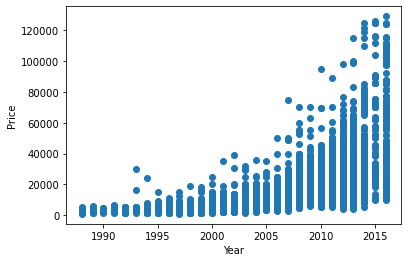

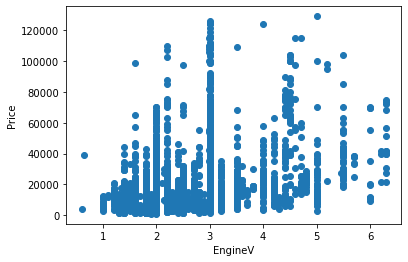

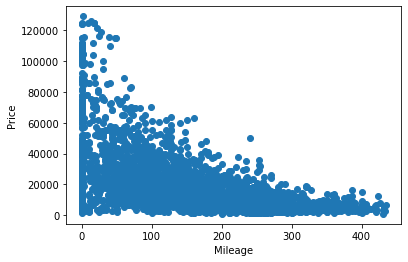

In [11]:
def plot_scatter(df, x_list, y):
    for x in x_list:
        plt.scatter(df[x], df[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
x_list = ["Year", "EngineV", "Mileage"]
plot_scatter(df_clean, x_list, "Price")

das Ergbnis ist nicht linear, weil der Preis nicht normal verteilt ist. Und wegen der Exponentialverteilung, können logarithmieren das Problem löschen 

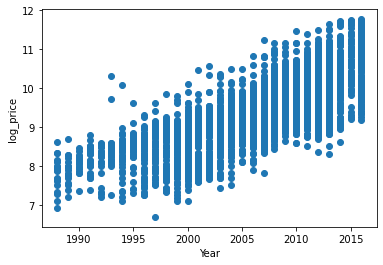

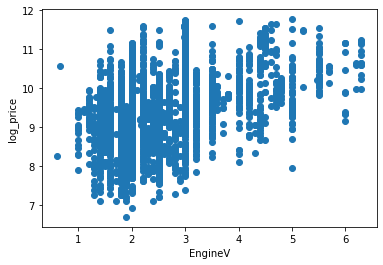

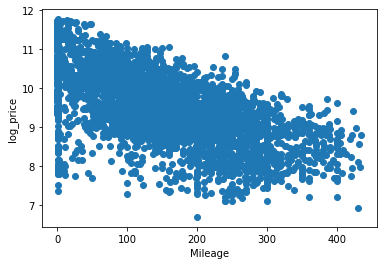

In [12]:
df_clean['log_price'] = np.log(df_clean['Price'])
plot_scatter(df_clean, x_list, "log_price")

2. Endogenität: Das kann nicht von Datei checken, sondern von Überlegung.
3. Normalität und Homoskedastizität für Störgröße:
Normalität wird sichergestellt durch CLT, nullmittelwert wird durch die Einbeziehung des Achsenabschnitts sichergestellt, weil wir Logarithmus benutzt haben, zeigt das Aufzeichen von x gegen z die Homoskedastizität
4. keine Autokorrelation: Die uns vorliegenden Stichproben stammen nicht aus Zeitreihendaten oder Paneldaten, daher frei von diese Verletzung sind
5. Multikollinearität: je älter das Auto desto länger des Kiloometerstands, deswegen haben wir mehr oder weniger solche Problem

In [13]:
#Multikollinearität prüfen (kein sklearn Funktion dafür gibt)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = x_list
vif["VIF"] = [variance_inflation_factor(df_clean[x_list].values, i) for i in range(len(x_list))]
vif

,features,VIF
0,Year,10.354854
1,EngineV,7.662068
2,Mileage,3.791584


VIF größer als 5 gilt als problematisch, um Multikollinearität zu vermeiden, entnehmen wir Jahr hier, aber unter die folgende 3 Situation, kann Multikollinearität ignoniert werden
1. Die Variablen mit hohen VIFs sind Kontrollvariablen, und die Variablen von Interesse haben keine hohen VIFs.
2. Die hohen VIFs werden durch die Einbeziehung von Potenzen oder Produkten anderer Variablen verursacht.
3. Die Variablen mit hohen VIFs sind Indikatorvariablen (Dummyvariablen), die eine kategoriale Variable mit drei oder mehr Kategorien darstellen.
Quelle: https://statisticalhorizons.com/multicollinearity/

### Dummy-Variablen erstellen

In [14]:
df_drop_extra = df_clean.drop(["Year", "Price", "Model"], axis=1)
#ohne drop_first=True, würde es zu einer Dummy Variable Falle kommen
df_dummies = pd.get_dummies(df_drop_extra, drop_first=True)	
df_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [15]:
#nochmal multikollinearität prüfen
x_list = df_dummies.columns
x_list = x_list.drop("log_price")

vif = pd.DataFrame()
vif["features"] = x_list
vif["VIF"] = [variance_inflation_factor(df_dummies[x_list].values, i) for i in range(len(x_list))]
vif

,features,VIF
0,Mileage,4.459662
1,EngineV,7.841729
2,Brand_BMW,2.294007
3,Brand_Mercedes-Benz,2.868649
4,Brand_Mitsubishi,1.641712
5,Brand_Renault,2.086774
6,Brand_Toyota,2.162166
7,Brand_Volkswagen,2.844515
8,Body_hatch,1.464260
9,Body_other,1.534059


das größte Problem kommt aus Registration_yes, weil die meisten Wert yes sind. Wir können diese Variabel weglassenm aber sie wäre höchstwahrscheinlich sowieso unbedeutend

### Variablen und Testdatei erstellem

In [16]:
#Variablen für Modell erstellen
target = df_dummies["log_price"]
inputs = df_dummies.drop("log_price", axis=1)

In [26]:
#Standardisierung
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)  
inputs_scaled = scaler.transform(inputs)

In [27]:
#Zug- und Testteilung
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

Dummy-Variabels sollten nicht standardisiert werden, dennoch in Maschinellen Lernen es nicht so ernshaft ein Problem ist, weil die Prognostizierte Leistung wird nicht beeinflusst. Trotzdem wird die Bedeutung der Dummys verlieren.

### Fetureauswahl

In [52]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X_train, y_train)
f_summary = pd.DataFrame(data={"f_values": f_values, "p_values": p_values.round(3)}, index=inputs.columns)
f_summary

,f_values,p_values
Mileage,1935.436686,0.000
EngineV,644.334578,0.000
Brand_BMW,19.599504,0.000
Brand_Mercedes-Benz,47.258609,0.000
Brand_Mitsubishi,22.891009,0.000
Brand_Renault,140.751167,0.000
Brand_Toyota,69.095780,0.000
Brand_Volkswagen,32.767851,0.000
Body_hatch,67.556737,0.000
Body_other,4.768834,0.029


Das Einzige P-Wert größer als 0,05 ist Engine Type others in vergleichen zum abgefallenen
### Regression


In [29]:
#Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Predictions (y_hat)')

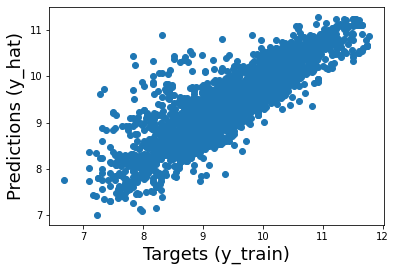

In [31]:
#Resultat schauen
y_hat = reg.predict(X_train)
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)


die Vorhersagen ausreichend mit den Zielen in Zusammenhang stehen 

Text(0.5, 1.0, 'Residuals PDF')

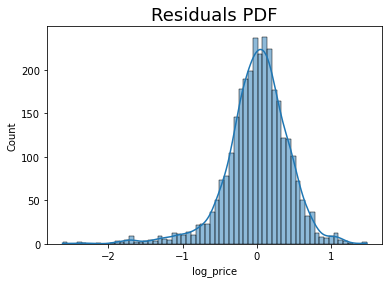

In [32]:
#Residuen plotten
sns.histplot(y_train - y_hat, kde=True)
plt.title("Residuals PDF", size=18)

grundsätzlich normalverteilt mit einem langen linken Tail, das heißt, es neigt dazu, zu überschätzen

In [33]:
#Bestimmtheitsmaß
reg.score(X_train, y_train)

0.7546487921881218

In [35]:
#Gewichte und Bias
print(reg.intercept_)
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

9.421003614148074


,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


Brand-Dummys sind in vergleichen mit Audi, Body-Dummys sind in vergleichen mit crossover, Engine Type-Dummys sind in vergleichen mit Diesel, deshalb darf man nicht die Dummys mit anderen vergleichen
### Testing

Text(0, 0.5, 'Predictions (y_hat_test)')

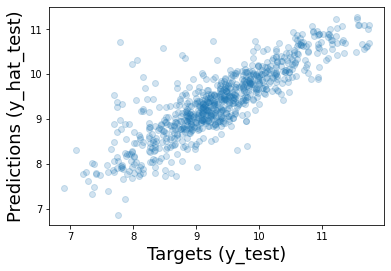

In [ ]:
#Testdaten plotten
y_hat_test = reg.predict(X_test)
#alpha ist die Opazität. Sie macht die Punkte transparent und zeigt so, wo sich viele Punkte überschneiden
plt.scatter(y_test, y_hat_test, alpha=0.2)  
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

In [42]:
#Residuen analysieren
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_pf["Target"] = np.exp(y_test.reset_index()["log_price"])
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [45]:
#sortieren die größten Unterschiede
df_pf.sort_values(by="Difference%", ascending=False).head(10)

,Prediction,Target,Residual,Difference%
681,45259.020603,2400.0,-42859.020603,1785.792525
750,30076.594470,3150.0,-26926.594470,854.812523
219,27632.396163,2900.0,-24732.396163,852.841247
280,39469.510133,4800.0,-34669.510133,722.281461
713,13941.933769,2200.0,-11741.933769,533.724262
556,20887.209491,3500.0,-17387.209491,496.777414
260,33893.006837,6500.0,-27393.006837,421.430874
58,11913.906733,2300.0,-9613.906733,417.995945
562,31429.042528,6800.0,-24629.042528,362.191802
747,10572.989808,2300.0,-8272.989808,359.695209


Hier wird darauf hingewiesen, dass möglicherweise zu mindesten eine Variabel übersehen wurde, z.B. Schaden